In [39]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# change plot style
plt.style.use('ggplot')
# increase max number of columns displayed
pd.set_option('display.max_columns', 200)


In [260]:
# creating a dataframe with the excel file 

df = pd.read_excel('Zephyr_Export_3.xls', sheet_name=1)

df.head()

WARNING *** file size (334746) not 512 + multiple of sector size (512)


,Unnamed: 0,Deal Number,Deal value\nth EUR,Deal status,Target stock price prior to announcement\nEUR,Acquiror operating revenue/turnover\nth EUR\nLast avail. yr,Target operating revenue/turnover\nth EUR\nLast avail. yr,Target major sector,Acquiror major sector,Acquiror net profit\nth EUR\nLast avail. yr,Target net profit\nth EUR\nLast avail. yr
0,1.0,1.909545e+09,"134,715,295.00*",Withdrawn,n.a.,23001570.174142,2281000.0,"Chemicals, rubber, plastics, non-metallic prod...","Food, beverages, tobacco",893847.976969,454000.0
1,NaN,NaN,NaN,NaN,n.a.,NaN,2976000,"Chemicals, rubber, plastics, non-metallic prod...",NaN,NaN,18946000
2,2.0,1.909650e+09,"114,532,984.98*",Withdrawn,n.a.,n.a.,45611254.28158,"Machinery, equipment, furniture, recycling","Machinery, equipment, furniture, recycling",n.a.,13349031.343586
3,3.0,1.909095e+09,"85,746,684.31*",Withdrawn,n.a.,71771126.112,n.a.,"Chemicals, rubber, plastics, non-metallic prod...","Chemicals, rubber, plastics, non-metallic prod...",19406669.52,n.a.
4,4.0,5.358940e+05,"64,590,599.98*",Withdrawn,72.874837,62672578.716,56061259.38,Metals & metal products,Metals & metal products,n.a.,18624398.856


In [261]:
#transforming of n.a. (string) values to real na

df = df.replace('n.a.', np.nan).copy()

In [262]:
df = df.drop(df.columns[0:2], axis=1).copy()

In [263]:
df.head()

,Deal value\nth EUR,Deal status,Target stock price prior to announcement\nEUR,Acquiror operating revenue/turnover\nth EUR\nLast avail. yr,Target operating revenue/turnover\nth EUR\nLast avail. yr,Target major sector,Acquiror major sector,Acquiror net profit\nth EUR\nLast avail. yr,Target net profit\nth EUR\nLast avail. yr
0,"134,715,295.00*",Withdrawn,NaN,2.300157e+07,2.281000e+06,"Chemicals, rubber, plastics, non-metallic prod...","Food, beverages, tobacco",8.938480e+05,4.540000e+05
1,NaN,NaN,NaN,NaN,2.976000e+06,"Chemicals, rubber, plastics, non-metallic prod...",NaN,NaN,1.894600e+07
2,"114,532,984.98*",Withdrawn,NaN,NaN,4.561125e+07,"Machinery, equipment, furniture, recycling","Machinery, equipment, furniture, recycling",NaN,1.334903e+07
3,"85,746,684.31*",Withdrawn,NaN,7.177113e+07,NaN,"Chemicals, rubber, plastics, non-metallic prod...","Chemicals, rubber, plastics, non-metallic prod...",1.940667e+07,NaN
4,"64,590,599.98*",Withdrawn,72.874837,6.267258e+07,5.606126e+07,Metals & metal products,Metals & metal products,NaN,1.862440e+07


In [264]:
df.isna().sum()

Deal value\nth EUR                                              591
Deal status                                                     281
Target stock price prior to announcement\nEUR                   807
Acquiror operating revenue/turnover\nth EUR\nLast avail. yr     846
Target operating revenue/turnover\nth EUR\nLast avail. yr       446
Target major sector                                             284
Acquiror major sector                                            98
Acquiror net profit\nth EUR\nLast avail. yr                    1168
Target net profit\nth EUR\nLast avail. yr                       860
dtype: int64

In [265]:
df = df.drop(columns=['Acquiror net profit\nth EUR\nLast avail. yr']).copy()

In [266]:
df.nunique()

Deal value\nth EUR                                             930
Deal status                                                      3
Target stock price prior to announcement\nEUR                  680
Acquiror operating revenue/turnover\nth EUR\nLast avail. yr    540
Target operating revenue/turnover\nth EUR\nLast avail. yr      825
Target major sector                                             19
Acquiror major sector                                           19
Target net profit\nth EUR\nLast avail. yr                      581
dtype: int64

In [267]:
df.dtypes

Deal value\nth EUR                                              object
Deal status                                                     object
Target stock price prior to announcement\nEUR                  float64
Acquiror operating revenue/turnover\nth EUR\nLast avail. yr    float64
Target operating revenue/turnover\nth EUR\nLast avail. yr      float64
Target major sector                                             object
Acquiror major sector                                           object
Target net profit\nth EUR\nLast avail. yr                      float64
dtype: object

In [268]:
df['Deal value\nth EUR'] = df['Deal value\nth EUR'].apply(lambda x: float(str(x)
                                                               .replace('*', '')
                                                               .replace(',', '')
                                                               .replace('.', '')
                                                               .strip()
                                                              ))

In [269]:
# drop cat features with nan values
df = df.dropna(subset=['Deal status','Acquiror major sector', 'Target major sector'], how='any')


# one-hot encoding of features with more than two categories
df = pd.concat([df['Deal status'],
                     pd.get_dummies(df.drop('Deal status', axis=1),
                                    drop_first=True)], axis=1).copy()
# change variable name seperators
df.columns = (column.replace(" ", "_").replace("(", "_")
              .replace("&", "_").replace("-", "_").replace("\\", "_")
              for column in df.columns)



df.head()

,Deal_status,Deal_value\nth_EUR,Target_stock_price_prior_to_announcement\nEUR,Acquiror_operating_revenue/turnover\nth_EUR\nLast_avail._yr,Target_operating_revenue/turnover\nth_EUR\nLast_avail._yr,Target_net_profit\nth_EUR\nLast_avail._yr,"Target_major_sector_Chemicals,_rubber,_plastics,_non_metallic_products",Target_major_sector_Construction,"Target_major_sector_Education,_Health","Target_major_sector_Food,_beverages,_tobacco","Target_major_sector_Gas,_Water,_Electricity",Target_major_sector_Hotels___restaurants,Target_major_sector_Insurance_companies,"Target_major_sector_Machinery,_equipment,_furniture,_recycling",Target_major_sector_Metals___metal_products,Target_major_sector_Other_services,Target_major_sector_Post_and_telecommunications,"Target_major_sector_Primary_Sector__agriculture,_mining,_etc.)",Target_major_sector_Public_administration_and_defence,"Target_major_sector_Publishing,_printing","Target_major_sector_Textiles,_wearing_apparel,_leather",Target_major_sector_Transport,Target_major_sector_Wholesale___retail_trade,"Target_major_sector_Wood,_cork,_paper","Acquiror_major_sector_Chemicals,_rubber,_plastics,_non_metallic_products",Acquiror_major_sector_Construction,"Acquiror_major_sector_Education,_Health","Acquiror_major_sector_Food,_beverages,_tobacco","Acquiror_major_sector_Gas,_Water,_Electricity",Acquiror_major_sector_Hotels___restaurants,Acquiror_major_sector_Insurance_companies,"Acquiror_major_sector_Machinery,_equipment,_furniture,_recycling",Acquiror_major_sector_Metals___metal_products,Acquiror_major_sector_Other_services,Acquiror_major_sector_Post_and_telecommunications,"Acquiror_major_sector_Primary_Sector__agriculture,_mining,_etc.)",Acquiror_major_sector_Public_administration_and_defence,"Acquiror_major_sector_Publishing,_printing","Acquiror_major_sector_Textiles,_wearing_apparel,_leather",Acquiror_major_sector_Transport,Acquiror_major_sector_Wholesale___retail_trade,"Acquiror_major_sector_Wood,_cork,_paper"
0,Withdrawn,1.347153e+10,NaN,2.300157e+07,2.281000e+06,4.540000e+05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Withdrawn,1.145330e+10,NaN,NaN,4.561125e+07,1.334903e+07,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Withdrawn,8.574668e+09,NaN,7.177113e+07,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Withdrawn,6.459060e+09,72.874837,6.267258e+07,5.606126e+07,1.862440e+07,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,Withdrawn,4.536938e+09,94.790262,NaN,9.767788e+06,1.651951e+06,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [270]:
df.isna().sum()
df.dtypes

Deal_status                                                                  object
Deal_value\nth_EUR                                                          float64
Target_stock_price_prior_to_announcement\nEUR                               float64
Acquiror_operating_revenue/turnover\nth_EUR\nLast_avail._yr                 float64
Target_operating_revenue/turnover\nth_EUR\nLast_avail._yr                   float64
Target_net_profit\nth_EUR\nLast_avail._yr                                   float64
Target_major_sector_Chemicals,_rubber,_plastics,_non_metallic_products        uint8
Target_major_sector_Construction                                              uint8
Target_major_sector_Education,_Health                                         uint8
Target_major_sector_Food,_beverages,_tobacco                                  uint8
Target_major_sector_Gas,_Water,_Electricity                                   uint8
Target_major_sector_Hotels___restaurants                                    

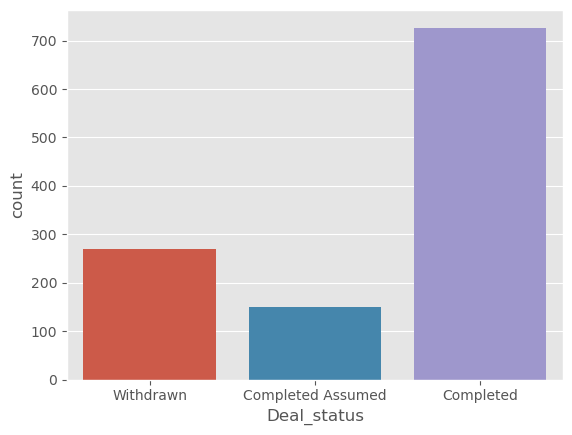

In [271]:
sns.countplot(x='Deal_status', data=df)
plt.show()

In [272]:
# drop rows for completed assumed
df = df[df['Deal_status'] != 'Completed Assumed'].copy()

df['Deal_status'] = df['Deal_status'].map({'Completed':1, 'Withdrawn':0})

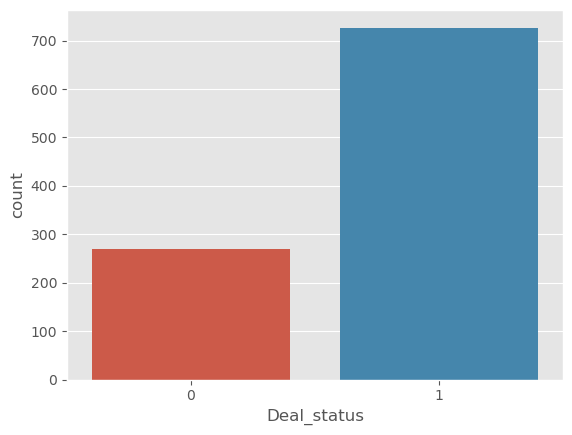

In [273]:
sns.countplot(x='Deal_status', data=df)
plt.show()

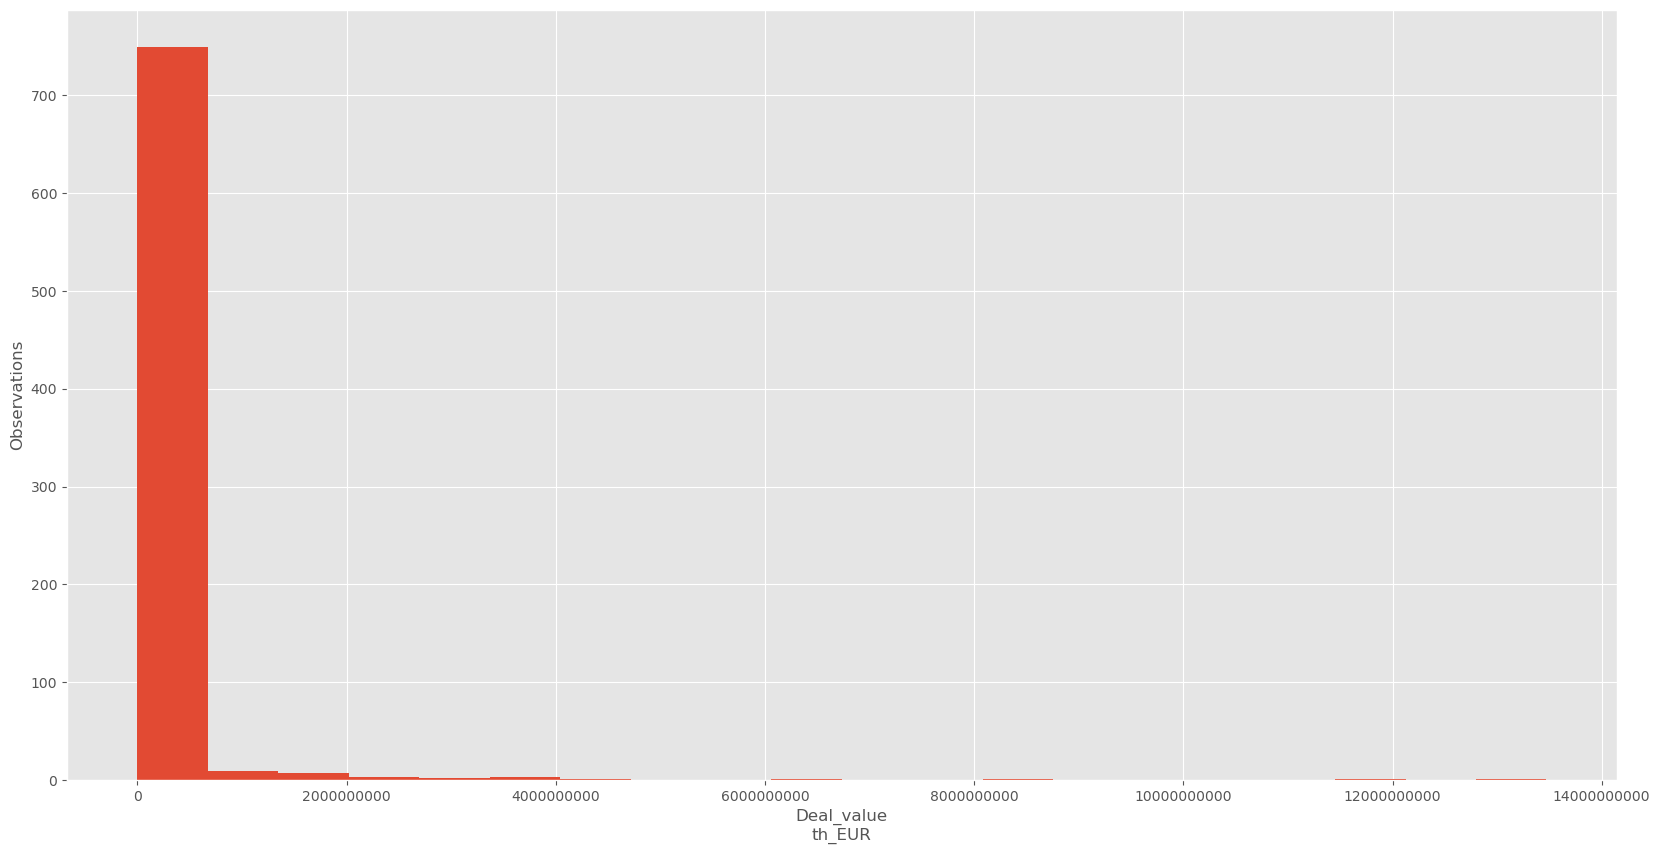

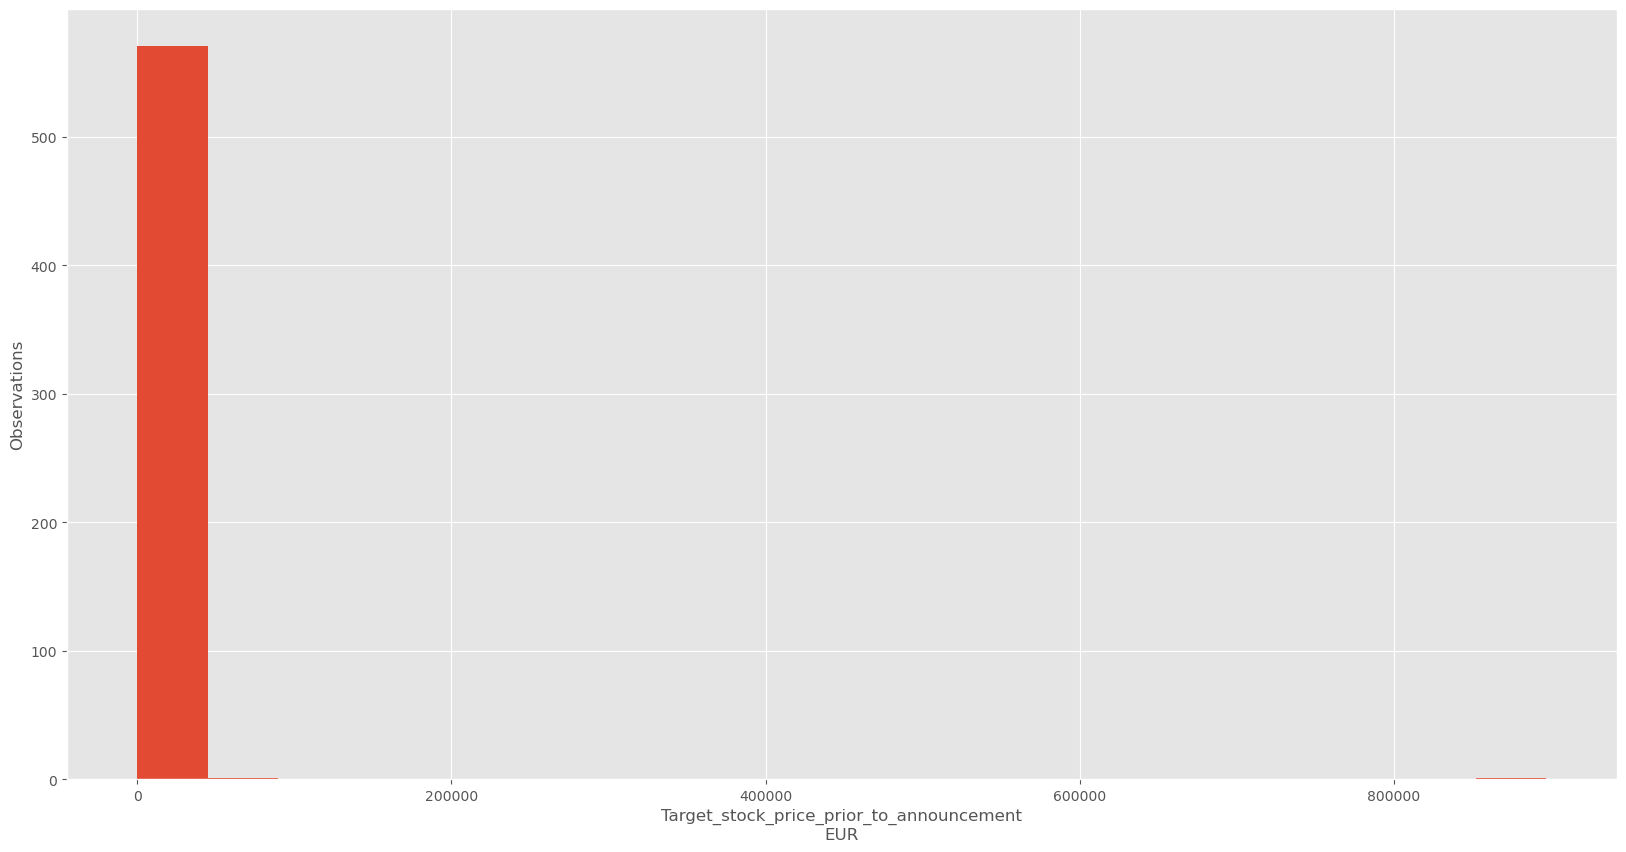

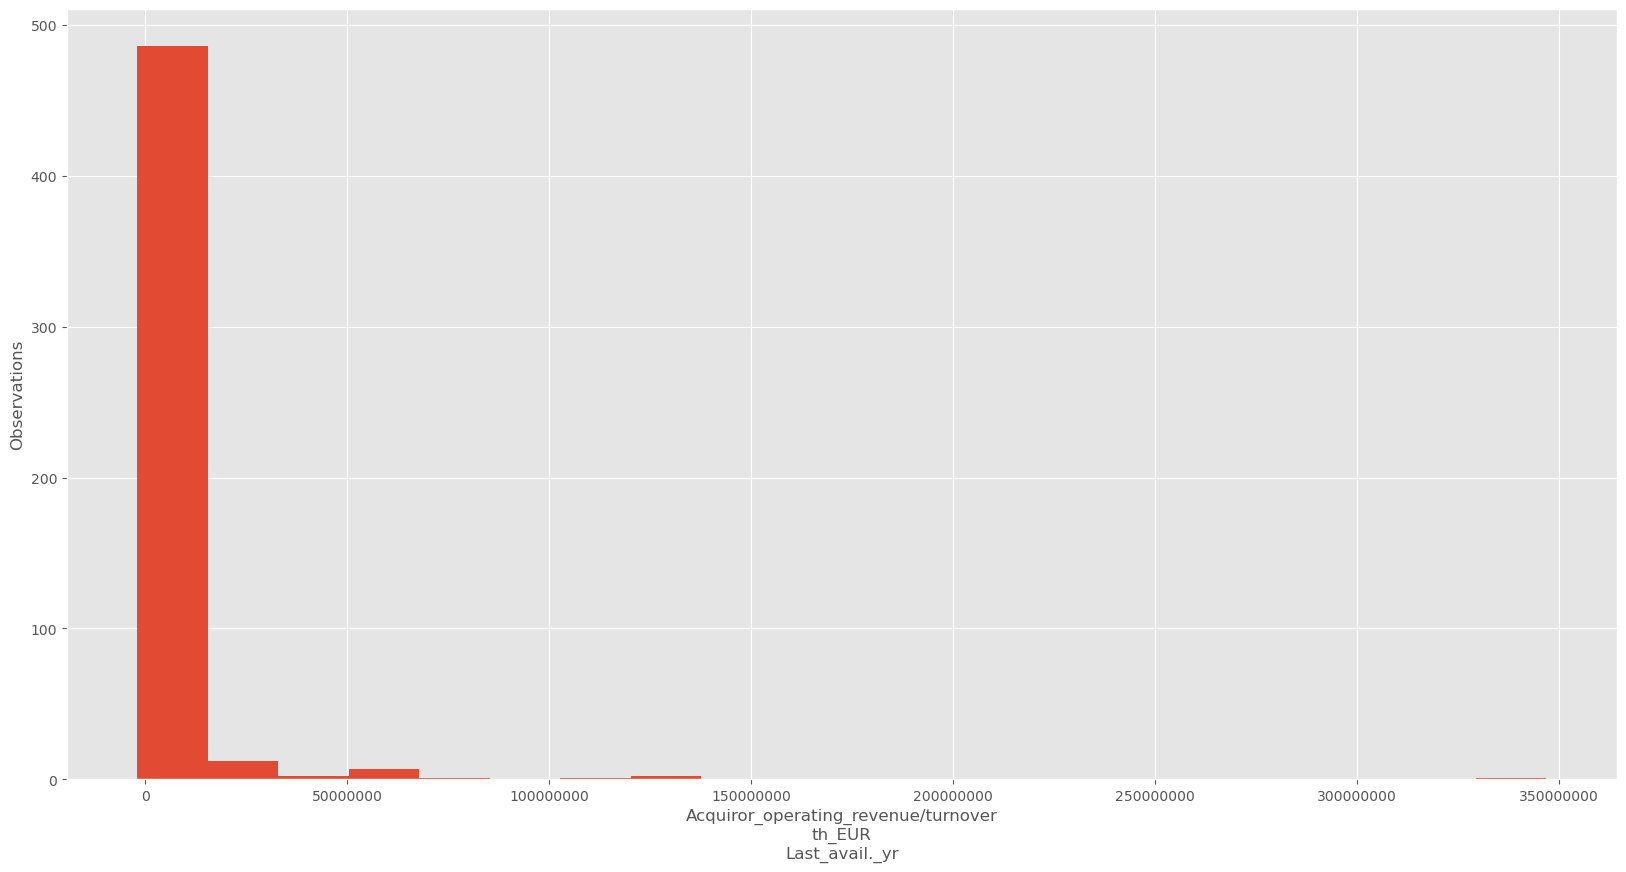

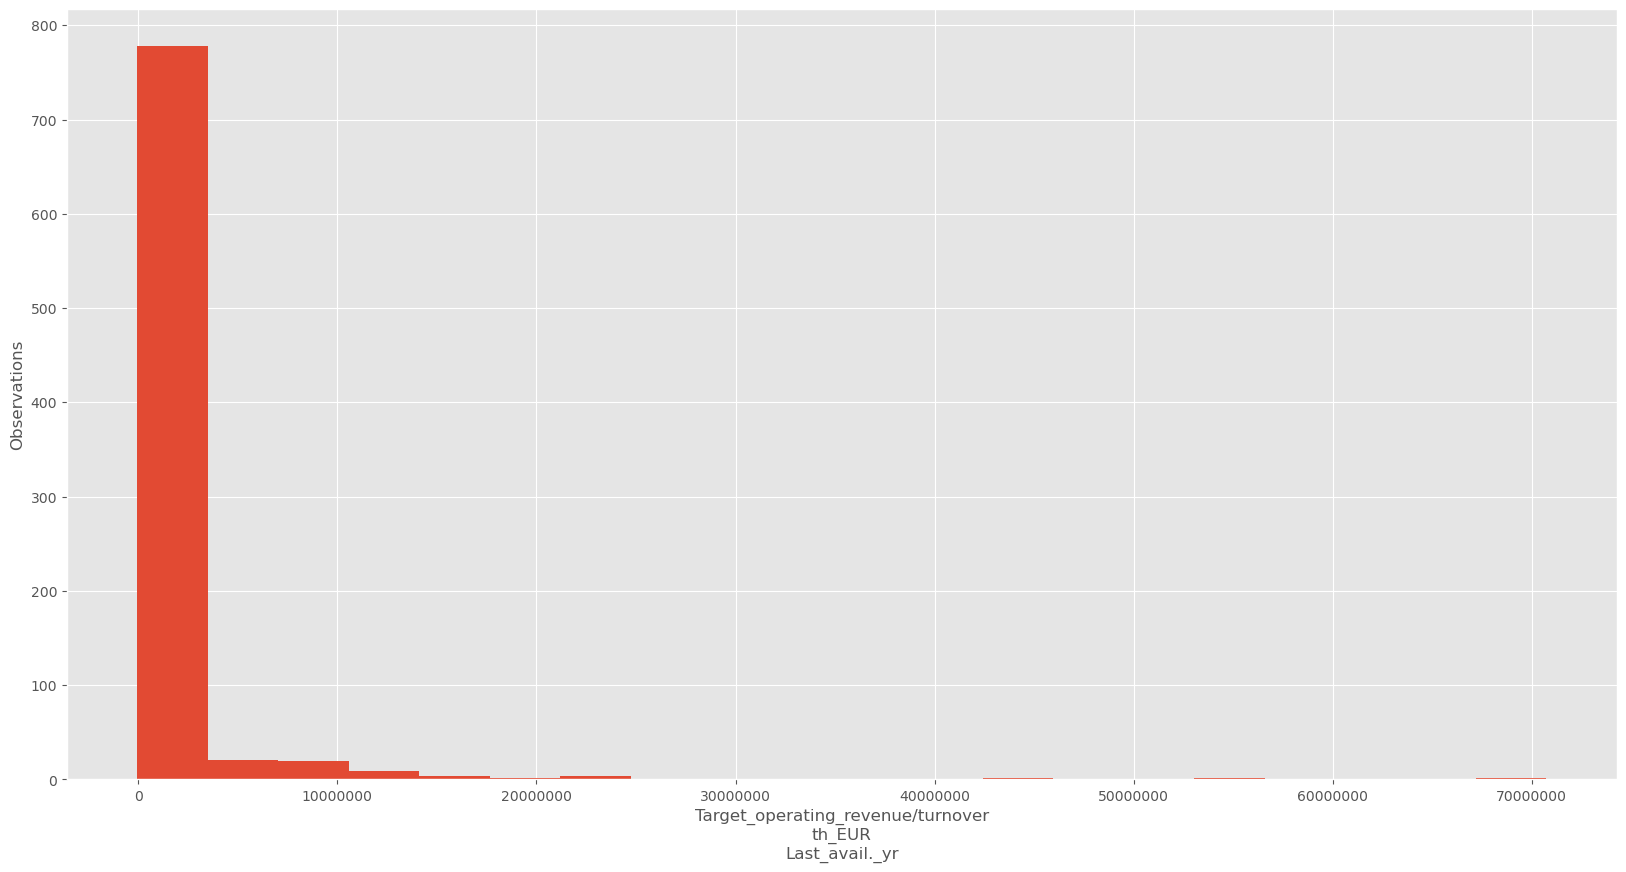

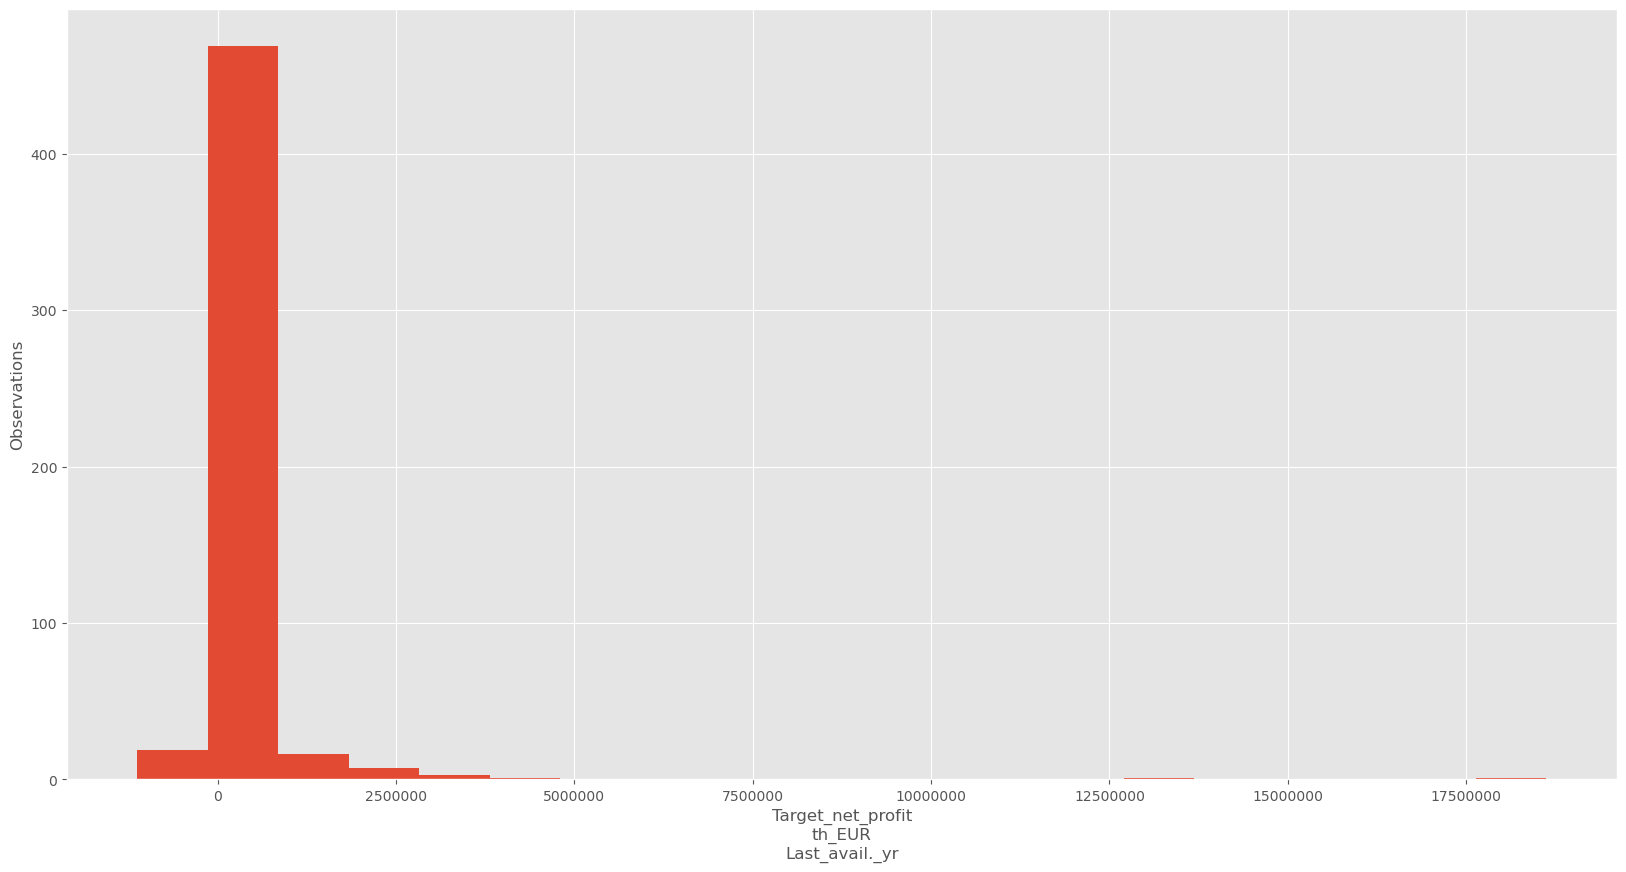

In [274]:
num_vals = df.select_dtypes(include='float64').columns

# plot histogram for all numerical values
for n in num_vals:
    df[n].hist(bins=20, figsize=(20, 10))
    plt.xlabel(n)
    plt.ylabel('Observations')
    plt.ticklabel_format(useOffset=False, style='plain')
    # show plot
    plt.show()

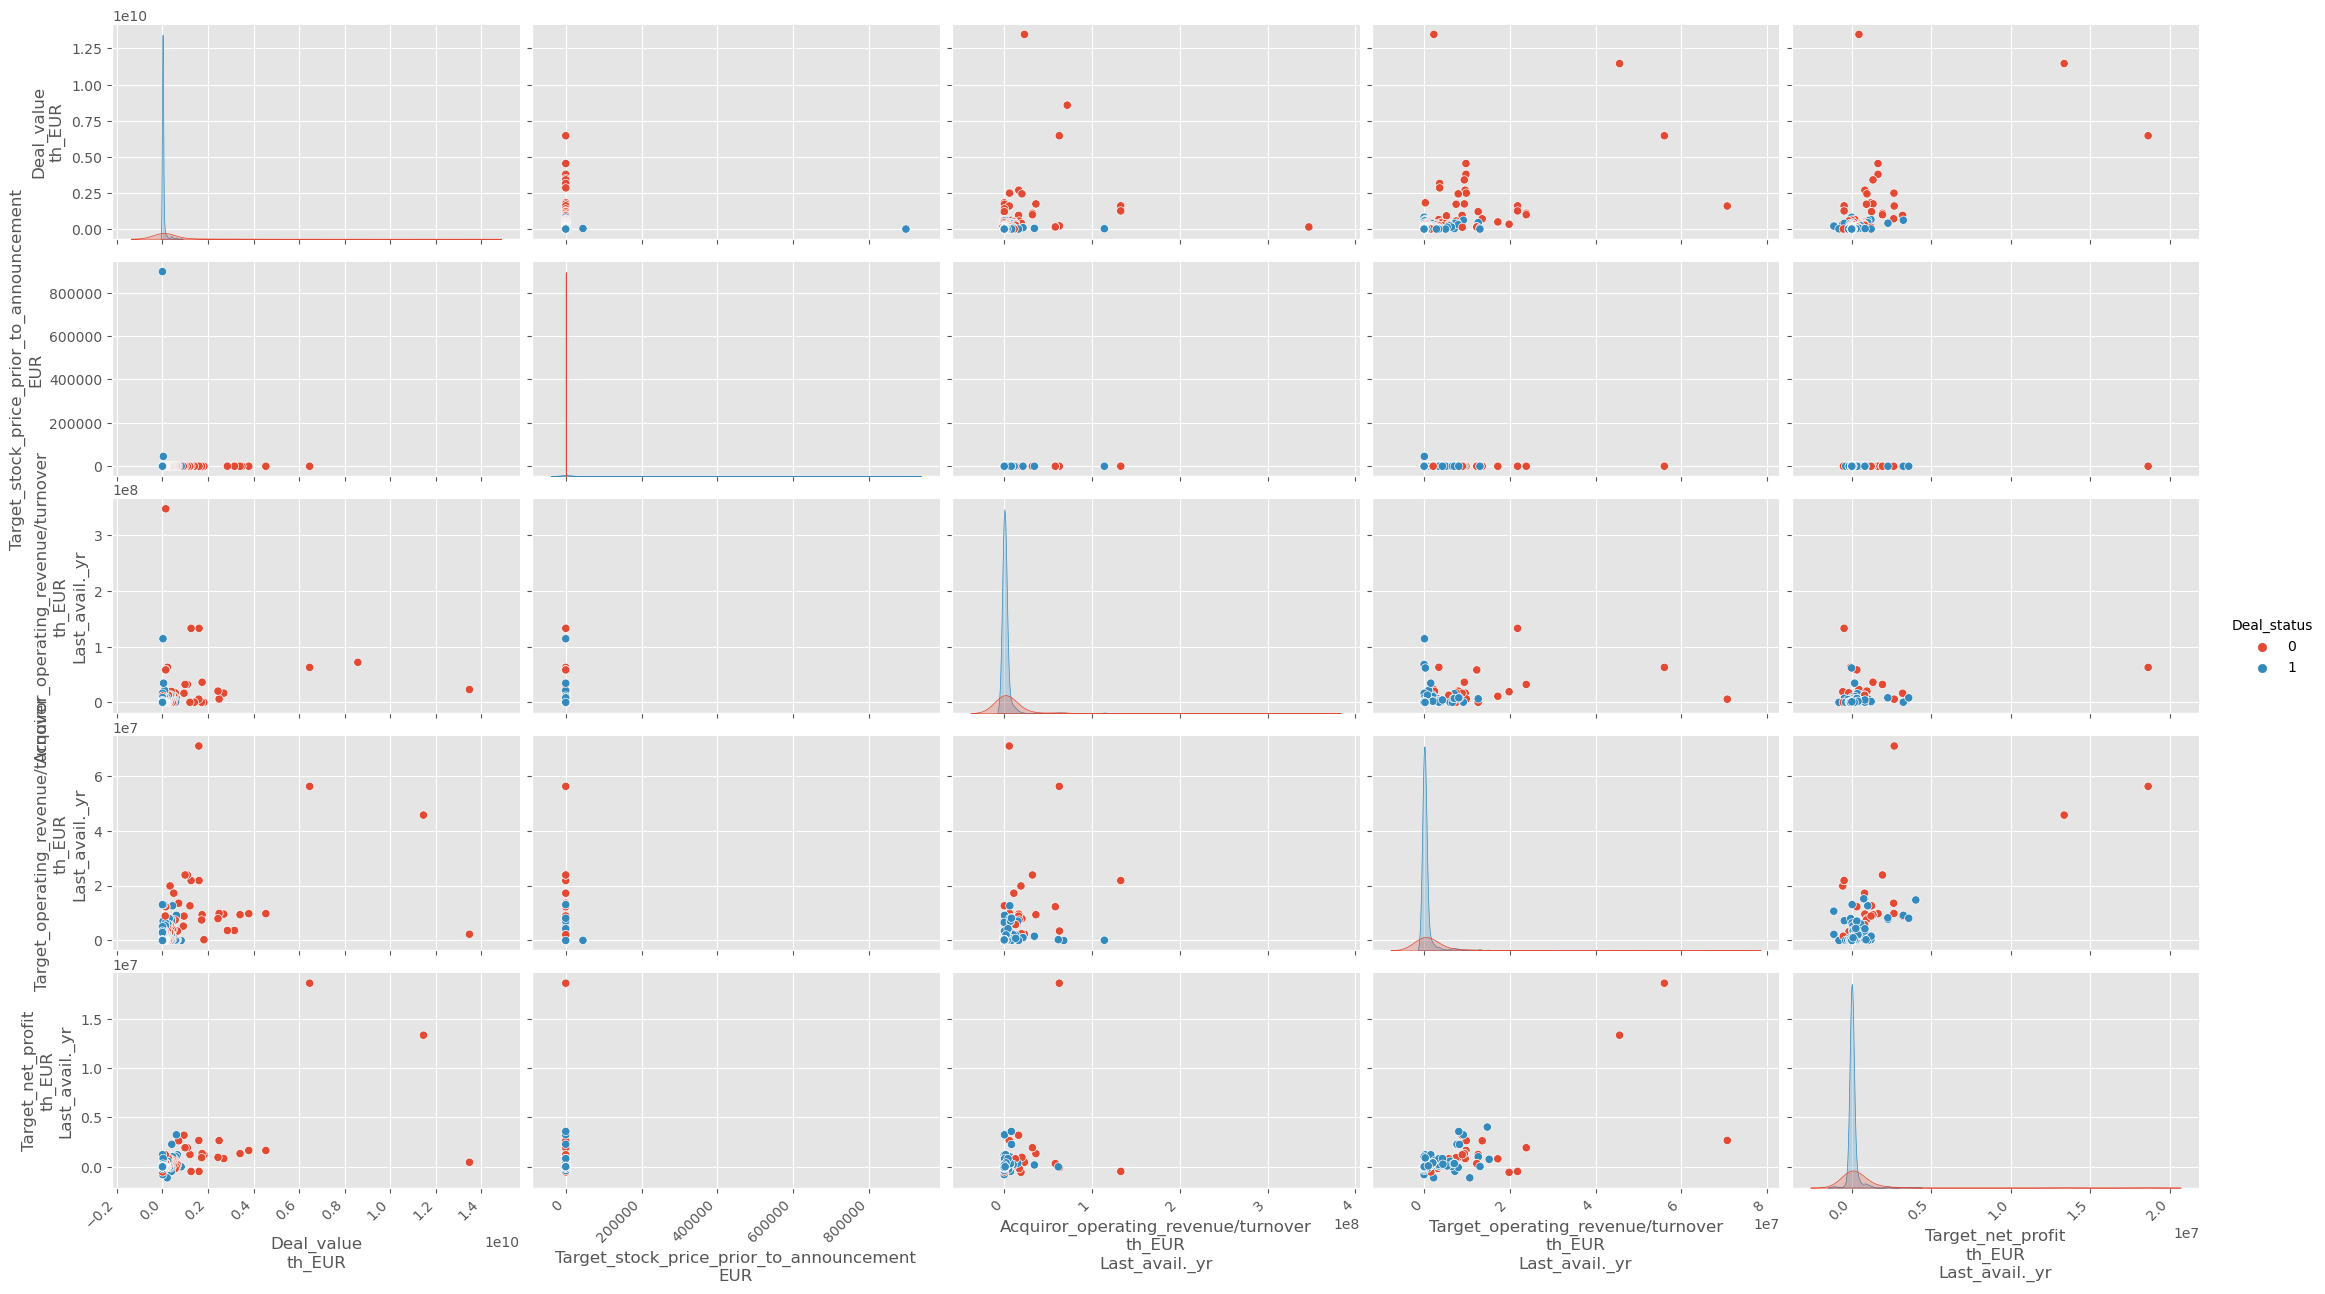

In [275]:
g = sns.pairplot(df, vars=num_vals, hue='Deal_status', height=3, aspect=1.5)
g.fig.autofmt_xdate(rotation=45)
plt.show()

In [278]:
# impute median for numerical variables to get rid of nan values
num_vals = df.select_dtypes(include='float64').columns

for n in num_vals:
    m = df[n].median()
    df[n] = df[n].fillna(m)  

In [279]:
df.isna().sum()

Deal_status                                                                 0
Deal_value\nth_EUR                                                          0
Target_stock_price_prior_to_announcement\nEUR                               0
Acquiror_operating_revenue/turnover\nth_EUR\nLast_avail._yr                 0
Target_operating_revenue/turnover\nth_EUR\nLast_avail._yr                   0
Target_net_profit\nth_EUR\nLast_avail._yr                                   0
Target_major_sector_Chemicals,_rubber,_plastics,_non_metallic_products      0
Target_major_sector_Construction                                            0
Target_major_sector_Education,_Health                                       0
Target_major_sector_Food,_beverages,_tobacco                                0
Target_major_sector_Gas,_Water,_Electricity                                 0
Target_major_sector_Hotels___restaurants                                    0
Target_major_sector_Insurance_companies                         

In [281]:
# correlations between target variable and independent variables
target_corr = df_corr.loc['Deal_status', :]
print(target_corr)

Deal_status                                                                 1.000000
Deal_value\nth_EUR                                                         -0.212672
Target_stock_price_prior_to_announcement\nEUR                               0.028112
Acquiror_operating_revenue/turnover\nth_EUR\nLast_avail._yr                -0.168467
Target_operating_revenue/turnover\nth_EUR\nLast_avail._yr                  -0.218214
Target_net_profit\nth_EUR\nLast_avail._yr                                  -0.153678
Target_major_sector_Chemicals,_rubber,_plastics,_non_metallic_products     -0.007928
Target_major_sector_Construction                                            0.012180
Target_major_sector_Education,_Health                                      -0.155676
Target_major_sector_Food,_beverages,_tobacco                                0.007961
Target_major_sector_Gas,_Water,_Electricity                                 0.034140
Target_major_sector_Hotels___restaurants                         

no strong linear relationship 

# Model

In [313]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

# Imports GLM 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Import Machine learning algorithms
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import StandardScaler # Import Feature Importance StandardScaler

# Import metric for performance evaluation
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

# undersampling for class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree


In [288]:
# split for GLM exploration
X = df.drop('Deal_status', axis=1)
y = df['Deal_status']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                   y, test_size=0.3, random_state=42, stratify=y)
        

In [289]:
import plotly.express as px 

# visualize correlation between features
corr = X_train0.corr()
fig = px.imshow(corr, width=1000, height=1000)
fig.show()

# potentially drop highly correleated features
cor_matrix = X_train0.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

print("Highly correlated feature(s) dropped: ", to_drop)

Highly correlated feature(s) dropped:  ['Acquiror_major_sector_Education,_Health']


In [292]:
# feature scaling for logistic regression - MinMax Scaler (better for data sets that include outliers and/or skewed data)
sc = MinMaxScaler()
to_scale = [col for col in X_train.columns if X_train[col].nunique() > 2]

for col in to_scale:
    X_train[col] = sc.fit_transform(X_train[[col]])
    X_test[col] = sc.transform(X_test[[col]])  

In [293]:
# dealing with class imbalance
rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_train, y_train = rus.fit_resample(X_train, y_train)
print(len(X_train))

378


In [294]:
from sklearn.metrics import PrecisionRecallDisplay

def do_classify(clf, parameters, Xtr,ytr,Xdev,ydev, score_func=None, n_folds=5, n_jobs=2,model_name='model',label=1,prob_dec=1):

    if parameters:
        clf = cv_optimize(clf, parameters, Xtr, ytr, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtr, ytr)
    training_accuracy = clf.score(Xtr, ytr)
    test_accuracy = clf.score(Xdev, ydev)
    print("############# based on standard predict ################")
    print("Accuracy on training data: %0.2f" % (100*training_accuracy)+'%')
    print("Accuracy on test data:     %0.2f" % (100*test_accuracy)+'%')
    print("confusion_matrix on test data")
    ypred =  clf.predict(Xdev)
    print(confusion_matrix(ydev,ypred))
    print("classification report on test data")
    print(classification_report(ydev,ypred))
    print("########################################################")
    #  multi_auc_roc(clf,Xdev,ydev,prob=1)
    auc_tr = find_auc_score(clf,Xtr,ytr,color='g',name=model_name+'_tr',label=label,prob=prob_dec) 
    auc_dev = find_auc_score(clf,Xdev,ydev,color='orange',name=model_name+'_tst',label=label,prob=prob_dec)
    # precision recall curve
    recall_precision(clf,Xdev,ydev)
    return clf,auc_tr,auc_dev

def cv_optimize(clf, parameters, X, y, n_jobs=2, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_)
    #print(gs.grid_scores_)
    best = gs.best_estimator_
    return best

def find_auc_score(clf,Xin,yin,color='b',name='LogReg',label=1,prob=1) :
    '''Function to plot Receiver characteristics and find AUC'''
    if prob == 1:
        yscore = clf.predict_proba(Xin)
    else :
        yscore = clf.decision_function(Xin)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yin, yscore[:,label],pos_label=label)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    fig = plt.plot(false_positive_rate, true_positive_rate, color ,label='AUC '+name+' = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.01,1.01])
    plt.ylim([-0.01,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')   
    return roc_auc

# alternative simple roc plot
def plot_roc(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics.RocCurveDisplay.from_estimator(model, X_test, y_test) 
    plt.title(name)
    plt.show()
    def accuracy_report(y_pred):
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
    accuracy_report(y_pred)
    
    
def recall_precision(clf,Xin,yin):
    yscore = clf.predict_proba(Xin)
    precision, recall, threshold = precision_recall_curve(y_test, 
                                                      yscore[:,1])
    ap = average_precision_score(y_test, yscore[:,1])
    prd = PrecisionRecallDisplay(precision, recall, average_precision=ap)
    prd.plot()
    return

In [310]:
param1 = {'C' : [0.1,1, 10, 100],
                  'penalty' : ['l1', 'l2'],
                  #'class_weight' : [{0:1,1:5}, {0:1,1:10}, {0:1,1:25}, {0: 1, 1: 0.5}, {0: 1, 1: 0.75}],
                  'random_state' : [0, 42, 100, 200],
                  #'solver' : ['newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
    
}

param2 = {#'class_weight': [{0: 1, 1: 0.5}, {0: 1, 1: 2}, {0: 1, 1: 0.75}, {0:1,1:10}, {0:1,1:25}],
                            'max_depth': [2,], #complecxity of model .. more complex can have lower generalisation powere.. will overfit
                            'min_samples_leaf': [2,3,5],
                            'criterion': ['gini', 'entropy'],
                            'min_samples_split': [2, 3, 5],
                            'random_state' : [0, 42, 100, 200],
                            'n_estimators': [10, 40, 70] #in ensemble - how many DT
}

param3 = {#'class_weight': [{0: 1, 1: 0.5}, {0: 1, 1: 2}, {0: 1, 1: 0.75}, {0:1,1:10}, {0:1,1:25}],
                            'max_depth': [1,2,3,5], #complecxity of model .. more complex can have lower generalisation powere.. will overfit
                            #'min_samples_split': [2, 5],
                            'criterion' : ['gini', 'entropy'],
                            'random_state' : [0, 42, 100, 200],
}

param4 = {#'class_weight': [{0: 1, 1: 0.5}, {0: 1, 1: 2}, {0: 1, 1: 0.75}, {0:1,1:10}, {0:1,1:25}],
                            'C': [0.1,1, 10, 100], 
                            'gamma': [1,0.1,0.01,0.001],
                            'kernel': ['rbf', 'poly', 'sigmoid']
}

BEST {'C': 100, 'penalty': 'l1', 'random_state': 0} 0.6703675975144119
############# based on standard predict ################
Accuracy on training data: 68.78%
Accuracy on test data:     66.67%
confusion_matrix on test data
[[ 42  39]
 [ 61 158]]
classification report on test data
              precision    recall  f1-score   support

           0       0.41      0.52      0.46        81
           1       0.80      0.72      0.76       219

    accuracy                           0.67       300
   macro avg       0.60      0.62      0.61       300
weighted avg       0.70      0.67      0.68       300

########################################################


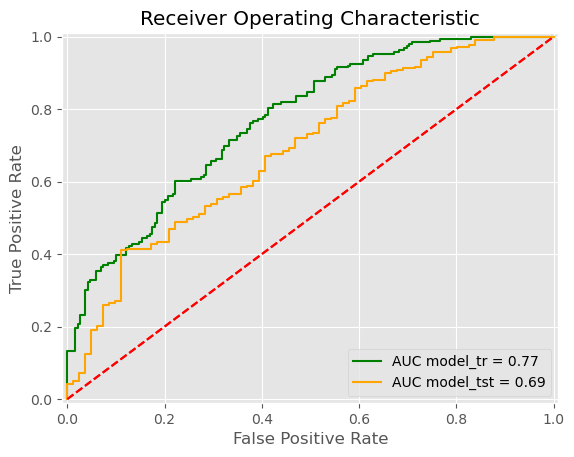

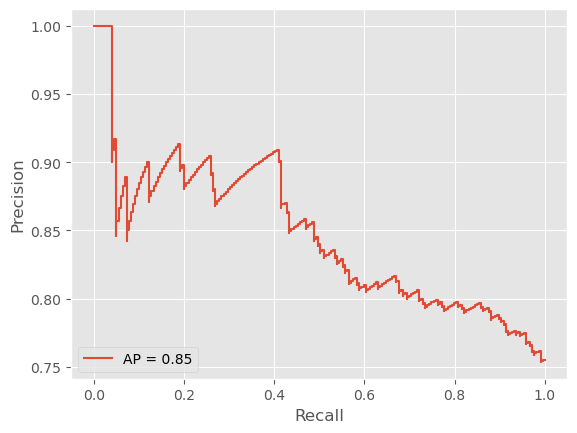

In [296]:
# Logistic Regression Tuning
lg, auc1, auc1 = do_classify(LogisticRegression(verbose=0, solver='liblinear'), param1, X_train,y_train,X_test,y_test, score_func='roc_auc', 
                                 n_folds=5, n_jobs=2,model_name='model',label=1,prob_dec=1)

BEST {'C': 100, 'gamma': 1, 'kernel': 'poly'} 0.6618739237852811
############# based on standard predict ################
Accuracy on training data: 75.13%
Accuracy on test data:     66.67%
confusion_matrix on test data
[[ 43  38]
 [ 62 157]]
classification report on test data
              precision    recall  f1-score   support

           0       0.41      0.53      0.46        81
           1       0.81      0.72      0.76       219

    accuracy                           0.67       300
   macro avg       0.61      0.62      0.61       300
weighted avg       0.70      0.67      0.68       300

########################################################


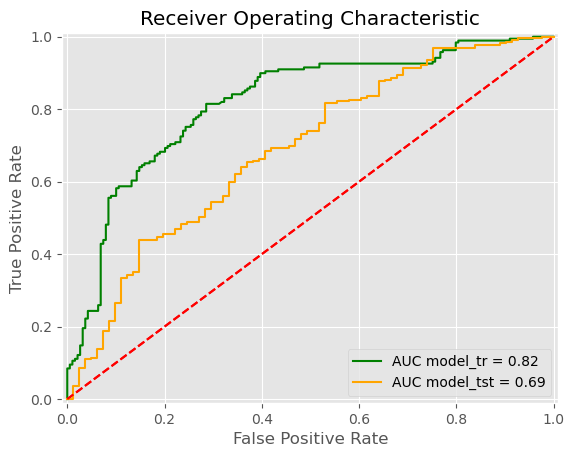

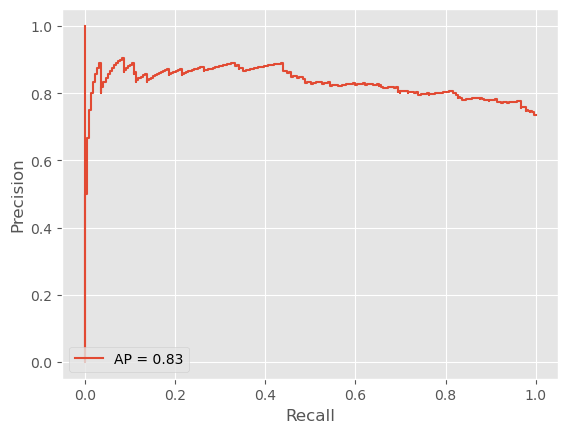

In [298]:
# SVM Tuning
sv, auc4, auc4 = do_classify(svm.SVC(probability=True), param4, X_train,y_train,X_test,y_test, score_func='roc_auc', 
                                 n_folds=5, n_jobs=2,model_name='model',label=1,prob_dec=1)

BEST {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 200} 0.7482724414164856
############# based on standard predict ################
Accuracy on training data: 69.84%
Accuracy on test data:     68.67%
confusion_matrix on test data
[[ 51  30]
 [ 64 155]]
classification report on test data
              precision    recall  f1-score   support

           0       0.44      0.63      0.52        81
           1       0.84      0.71      0.77       219

    accuracy                           0.69       300
   macro avg       0.64      0.67      0.64       300
weighted avg       0.73      0.69      0.70       300

########################################################


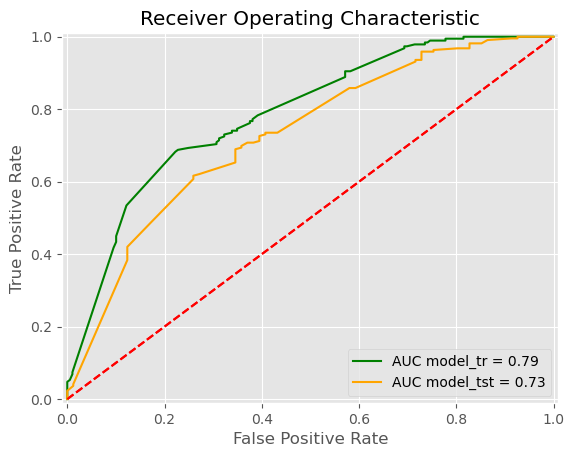

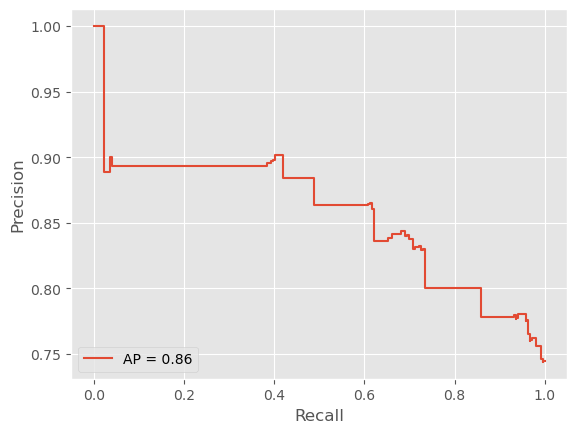

In [311]:
# Random Forest Tunning
rf, auc2, auc2 = do_classify(RandomForestClassifier(verbose=0), param2, X_train,y_train,X_test, y_test, score_func='roc_auc', 
                                 n_folds=5, n_jobs=2, model_name='model', label=1,prob_dec=1)

BEST {'criterion': 'entropy', 'max_depth': 3, 'random_state': 0} 0.7342142696713334
############# based on standard predict ################
Accuracy on training data: 69.84%
Accuracy on test data:     68.00%
confusion_matrix on test data
[[ 50  31]
 [ 65 154]]
classification report on test data
              precision    recall  f1-score   support

           0       0.43      0.62      0.51        81
           1       0.83      0.70      0.76       219

    accuracy                           0.68       300
   macro avg       0.63      0.66      0.64       300
weighted avg       0.73      0.68      0.69       300

########################################################


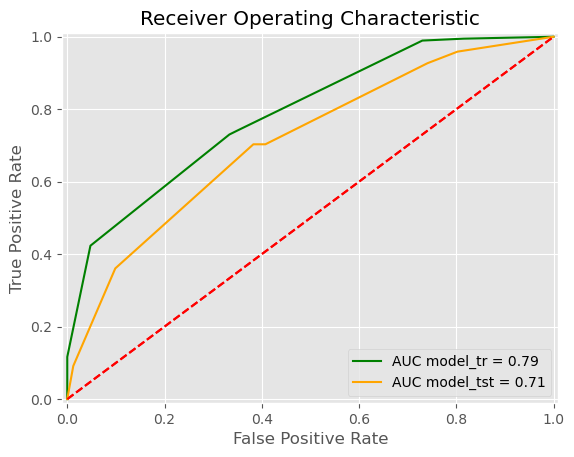

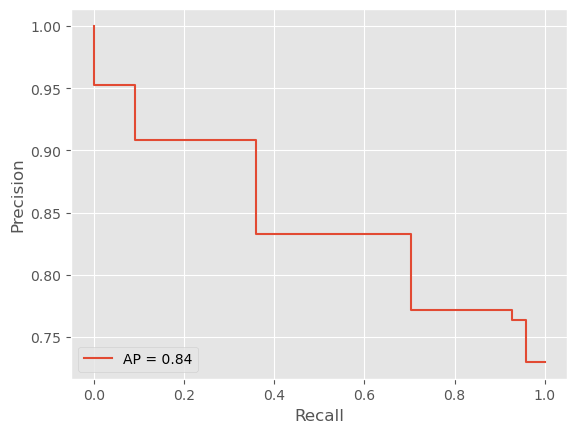

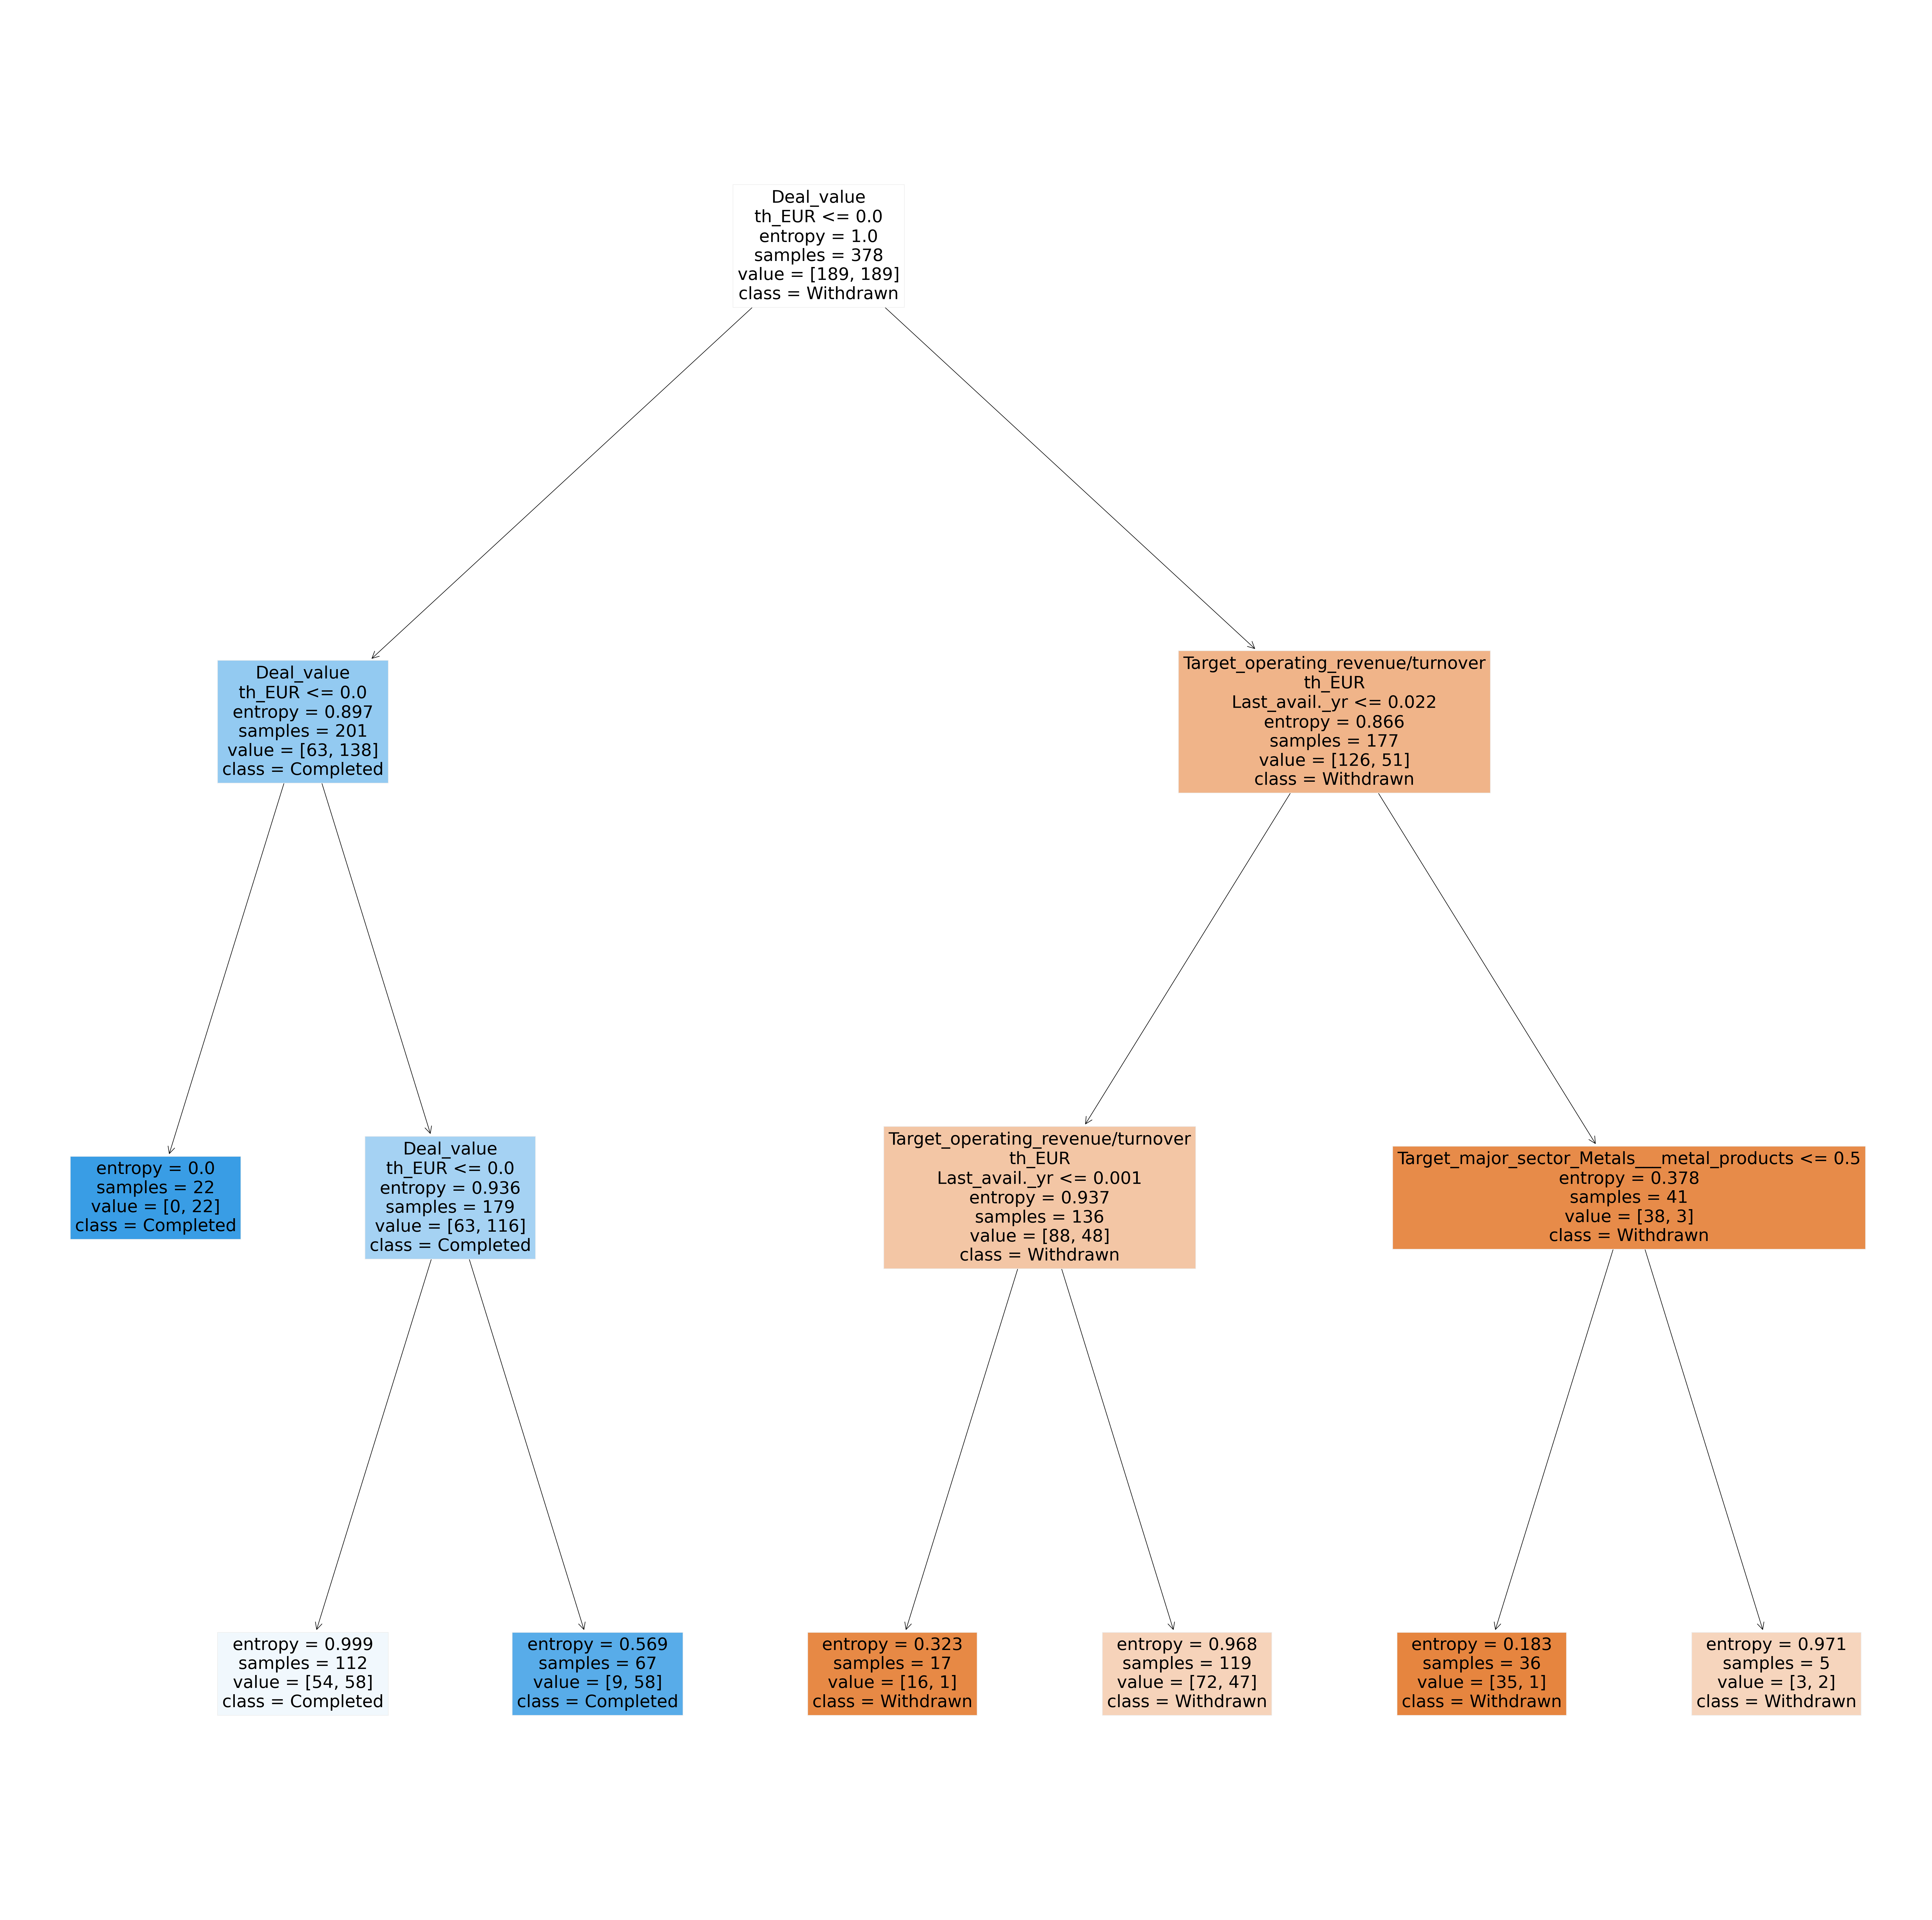

In [314]:
# Decision Tree Tuning

dt, auc3, auc3 = do_classify(DecisionTreeClassifier(), param3, X_train,y_train,X_test,y_test, score_func='roc_auc', 
                                 n_folds=5, n_jobs=2,model_name='model',label=1,prob_dec=1)

def plot_tree(clf, features):
    
    # Setting dpi = 300 to make image clearer than default
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,30), dpi=300)

    tree.plot_tree(clf,
           feature_names=features,
            # string class names must equate to their numerical representation in ascending order 
           class_names=["Withdrawn", "Completed"],
           filled=True,
           fontsize=15);
    # fig.savefig('tree.png')
    
plot_tree(dt, X_train.columns.tolist())

Text(0.5, 0, 'Relative Importance based on Information Gain (entropy)')

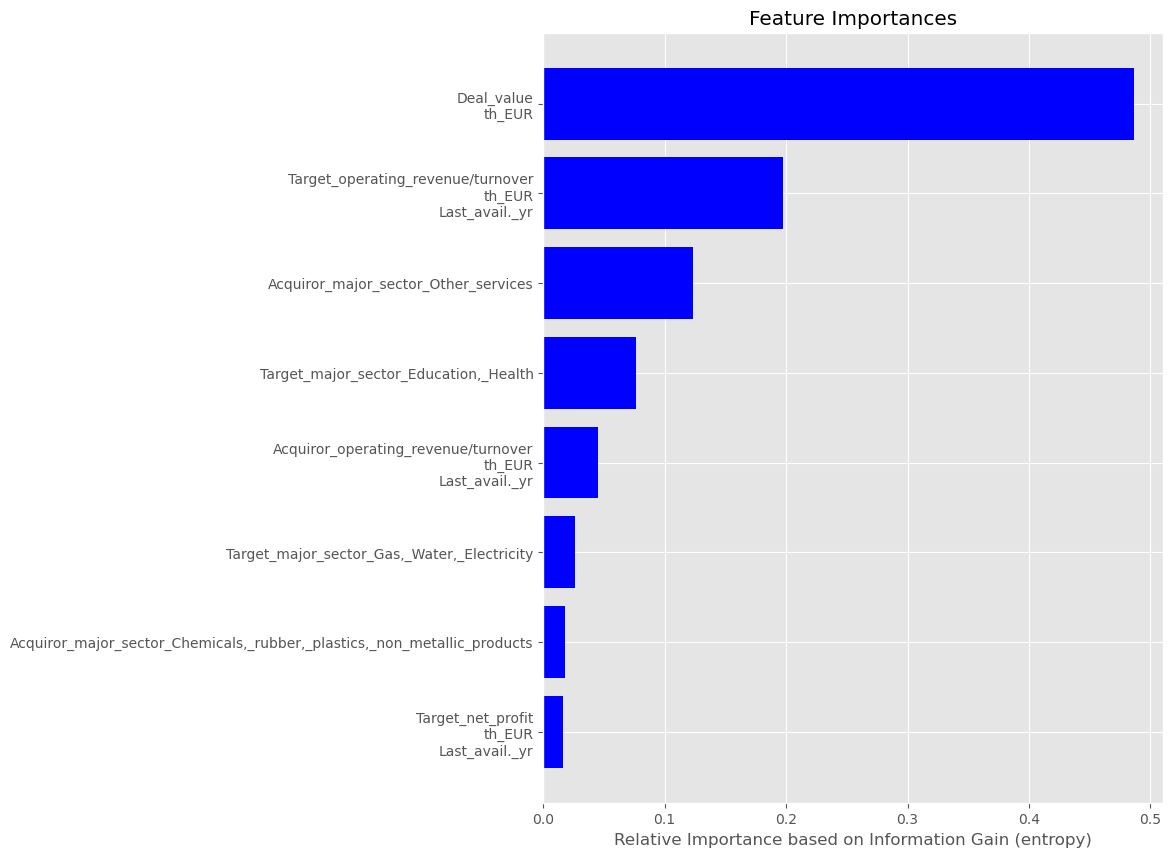

In [312]:
# plot features importances determined by RandomForest
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

f=plt.figure()
f.set_figwidth(8)
f.set_figheight(10)
plt.title('Feature Importances')
plt.barh(range(8), importances[indices][-8:], color='b', align='center')
plt.yticks(range(8), features[indices][-8:])
plt.xlabel('Relative Importance based on Information Gain (entropy)')